# Dictionary: Abstract Data Type (ADT)

An ADT that maintains set of items, each with a key

- insert(item): overwrite any existing key
- delete(item)
- search(key): return item with the given key and report if doesn't exist

Python dictionary (dict data type):
- D[key] ~ search
- D[key] = val ~ insert
- del D[key] ~ delete

In [4]:
D = {'summer':'char1','winter':'char2'}
#D['summer']
#D['spring'] = 'char3'
#del D['summer']
#D

{'winter': 'char2', 'spring': 'char3'}

## Motivation

- docdist
- database
- compilers & interpreters
- network router
- network server


## Simple Approach 

Direct-access table:
Store items in an array, indexed by their keys.

--> Badness:
 - keys may not be non negative integers
 - gigantic memory hog!!

--> Solution:

1/ prehash
- Maps keys to nonneg integers
- in theory, keys are finite and discrete (they are all strings of bits)
- in practice (python):
    - hash(x) is the prehash of x

In [19]:
#hash('abc')%20
#python hash for the string 'bac'
hash('bac')
class People():
    def __init__(self,name,age):
        self.name = name
        self.age = age
adam = People('Adam',21)
#return the position of adam
id(adam)

2/ Hashing:

- reduce universe U of all possible keys down to a reasonable size m for table
- Ideally: m = O(n) (n: #keys in dict)

There will be a lot of **collisions**! i.e. x,y in which h(x) = h(y) but x != y

### Chaining

- Linked list of colliding elements in each slot of hash table


--> It might lead to a worst case of every elements being hashed to the same key

Therefore, we need a hash function that is highly likely to hash the element to as equal-length linked list as possible

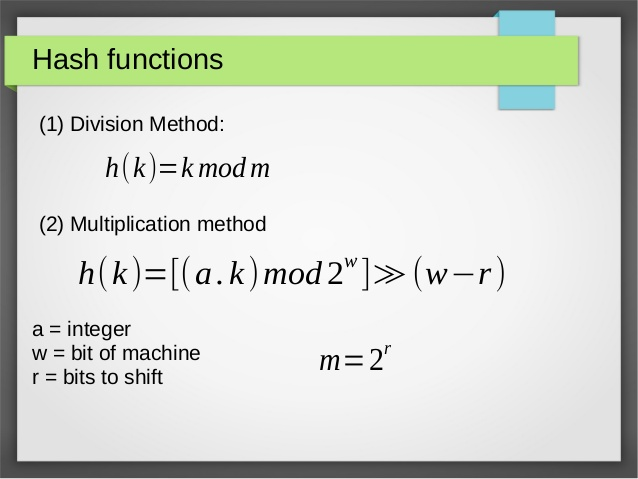

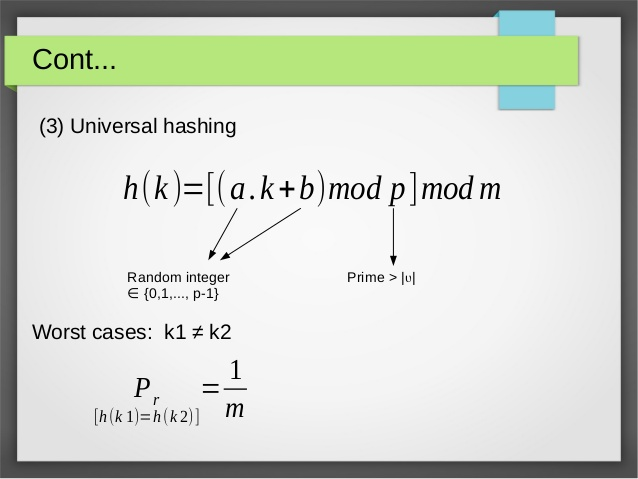

## Grow and Shrink the Hash Table

- We want m = theta(n)
- Idea: start small, grow and shrink as necessary

### Grow Table: m->m'

- make table of size m'
- build new hash h'
- rehash:
    
    for item in T:
        T'.insert(item)
- In general, this algorithm cost theta(n+m+m')


If n > m: grow the table
Try m' = m+1: 

-->cost of n inserts = theta(n^2)

Try m' = 2m: cost of n inserts: theta(1+2+4+..+n) = theta(n) (n < VT < 4n)

<< Table Doubling >>

### Amortization:
- operations take T(n) amortization if for k operations takes kT(n) time
- think of meaning: "T(n) on average" where average over all operations

## Deletion 
- Delete the item
- Shrink the table to half the size only when m < n/4
